In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

crypto_data = pd.read_csv('crypto_market_data.csv')


# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a StandardScaler instance
scaler = StandardScaler()



In [14]:
# Create a DataFrame with the scaled data
scaled_data = pd.DataFrame(scaler.fit_transform(crypto_data.iloc[:, 1:]), columns=crypto_data.columns[1:])
scaled_data.head()



# Copy the crypto names from the original data
crypto_names = crypto_data['coin_id'].to_frame()    


# Set the coinid column as index
crypto_names.set_index('coin_id', inplace=True)


# Display sample data
crypto_names.head()


""
coin_id
bitcoin
ethereum
tether
ripple
bitcoin-cash


### Find the Best Value for k Using the Original Scaled DataFrame.

In [15]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))




# Create an empty list to store the inertia values
inertia = []



# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow.head()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.612652


In [18]:
!pip install hvplot

import hvplot.pandas


# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve', xticks=k_values)



/Users/joetimmons/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [k]   (inertia)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [19]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)



In [20]:
# Fit the K-Means model using the scaled data
model.fit(scaled_data)



/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_data['class'] = model.predict(scaled_data)



# View the resulting array of cluster values.
crypto_data.head(10)



,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082,0


In [22]:
# Create a copy of the DataFrame
clustered_df = crypto_data.copy()



In [23]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = model.labels_
clustered_df.head(10)



# Display sample data
clustered_df.head(10)



,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082,0


<Axes: title={'center': 'Cryptocurrencies Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

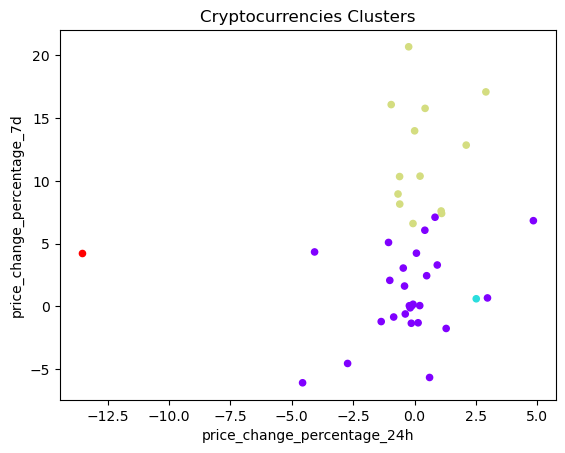

In [24]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="class", colormap="rainbow", colorbar=False, title="Cryptocurrencies Clusters")



### Optimize Clusters with Principal Component Analysis.

In [25]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)



In [26]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(scaled_data)



# View the first five rows of the DataFrame. 
crypto_pca[:5]



array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [27]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_



array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [28]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pcs_df = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"], index=crypto_names.index
)



# Copy the crypto names from the original data
crypto_names = crypto_data['coin_id'].to_frame()



# Set the coinid column as index
crypto_names.set_index('coin_id', inplace=True)



# Display sample data
crypto_names.head()



""
coin_id
bitcoin
ethereum
tether
ripple
bitcoin-cash


### Find the Best Value for k Using the PCA Data

In [30]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))



# Create an empty list to store the inertia values
inertia = []



# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pcs_df)
    inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)



# Display the DataFrame
df_elbow.head()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


In [31]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve', xticks=k_values)



/Users/joetimmons/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [k]   (inertia)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [32]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)




In [33]:
# Fit the K-Means model using the PCA data
model.fit(pcs_df)



/Users/joetimmons/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_names['class'] = model.predict(pcs_df)



# Print the resulting array of cluster values.
crypto_names.head(10)



,class
coin_id,
bitcoin,2
ethereum,2
tether,0
ripple,0
bitcoin-cash,2
binancecoin,2
chainlink,2
cardano,2
litecoin,2


In [35]:
# Create a copy of the DataFrame with the PCA data
clustered_df_pca = crypto_names.copy()



# Add a new column to the DataFrame with the predicted clusters
clustered_df_pca["class"] = model.labels_
clustered_df_pca.head(10)



# Display sample data
clustered_df_pca.head(10)



,class
coin_id,
bitcoin,2
ethereum,2
tether,0
ripple,0
bitcoin-cash,2
binancecoin,2
chainlink,2
cardano,2
litecoin,2


In [39]:


import hvplot.pandas

print(clustered_df_pca.columns)


# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "class" for the color to better visualize the data.
clustered_df_pca.hvplot.scatter(x="PCA1", y="PCA2", by="class", title="PCA Analysis", hover_cols=["coin_id"])





Index(['class'], dtype='object')


### Determine the Weights of Each Feature on each Principal Component

In [40]:
# Use the columns from the original scaled DataFrame as the index.
pcs_df.index = crypto_data.index



#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    